# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

In [ ]:
## Build Graph

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [ ]:
### Get data from source using regular expression

In [1]:
import re
a = "color or colour"
pattern = re.compile("colou?r")
pattern.findall(a)

['color', 'colour']

In [5]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"):continue
        if line.strip() == "":continue
        
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [6]:
city_info = get_city_info(coordination_source)

In [7]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [ ]:
### Compute distance between cities

In [8]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1,lon1 = origin 
    lat2,lon2 = destination
    radius = 6371 # km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2))*
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a),math.sqrt(1 - a))
    d = radius * c
    
    return d

In [9]:
def get_city_distance(city1, city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("重庆","成都")

277.5665030932603

In [10]:
get_city_distance("上海","北京")

727.52769688981

In [ ]:
### Draw the graph

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [14]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [17]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_info.keys()))

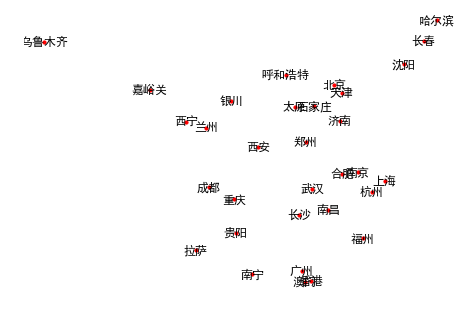

In [18]:
nx.draw(city_graph,city_info, with_labels=True,node_size=10)

In [ ]:
### Build connection

In [20]:
threshold = 700 #define the threshold

In [19]:
from collections import defaultdict

In [23]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
                
    return cities_connection

cities_connection = build_connection(city_info)

In [24]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [ ]:
### Draw connection graph

In [25]:
cities_connection_graph = nx.Graph(cities_connection)

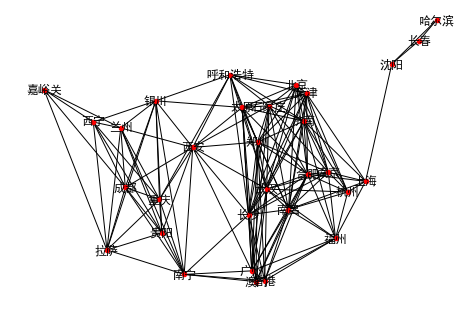

In [28]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size =20)

In [ ]:
### BFS 1 version

In [38]:
def search_1(graph,start,destination):
    pathes = [[start]] #list 用来存储待搜索路径
    visited = set() #set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        froniter = path[-1]  #提取即将要探索的节点
        if froniter in visited:
            continue  #检查如果该点已经探索过  则不用再探索
        
        successors = graph[froniter]
        
        for city in successors:  #遍历子节点
            if city in path:continue  # check loop 检查会不会形成环
            
            new_path = path + [city]
            
            pathes.append(new_path)  #bsf   #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs  深度优先
            
            if city == destination: #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)           
        

In [39]:
search_1(cities_connection,"北京","香港")

['北京', '武汉', '香港']

In [ ]:
### Optimal search using variation of BFS

In [40]:
def search_2(graph, start, destination, search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue
        
        if froniter == destination:
            return path
        
        successors = graph[froniter]
        
        for city in successors:
            if city in path:continue  #check loop
                
            new_path = path + [city]
            
            pathes.append(new_path)  #bfs
        
        pathes = search_strategy(pathes)
        visited.add(froniter)

In [41]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [43]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [44]:
get_distance_of_path(["哈尔滨","北京","广州"])

2037.4049251141844

In [45]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [46]:
search_2(cities_connection,"上海","北京",search_strategy=sort_by_distance)

['上海', '天津', '北京']

In [ ]:
## Machine Learning

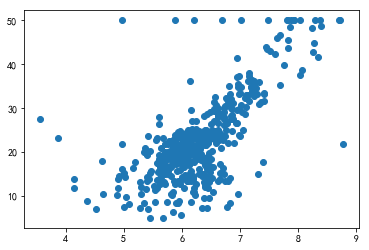

In [49]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()

x,y=dataset['data'],dataset['target']

X_rm = x[:,5]
plt.scatter(X_rm,y)

In [ ]:
### Gridient descent

In [55]:
# define target function
# y = k * rm + b

def price(rm,k,b):
    return k * rm + b

In [ ]:
### Define mean square loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [182]:
# define loss function

def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [ ]:
### define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [183]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [184]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 121.37781233534494, parameters k is 7.20975990817827 and b is -31.496437953600505
Iteration 1, the loss is 109.17402216598282, parameters k is 7.3212102738070595 and b is -31.47900087513206
Iteration 2, the loss is 98.88857700990188, parameters k is 7.42352781841436 and b is -31.462999520421175
Iteration 3, the loss is 90.21992713635314, parameters k is 7.517461018686631 and b is -31.44831622513825
Iteration 4, the loss is 82.9139242150134, parameters k is 7.603697010201405 and b is -31.43484296808698
Iteration 5, the loss is 76.75637016437454, parameters k is 7.682866614613462 and b is -31.422480580905216
Iteration 6, the loss is 71.56673726637645, parameters k is 7.755548954839947 and b is -31.41113802253446
Iteration 7, the loss is 67.1928754328463, parameters k is 7.822275692009841 and b is -31.400731713149924
Iteration 8, the loss is 63.50655145073678, parameters k is 7.883534915175914 and b is -31.391184922678104
Iteration 9, the loss is 60.39968942521287

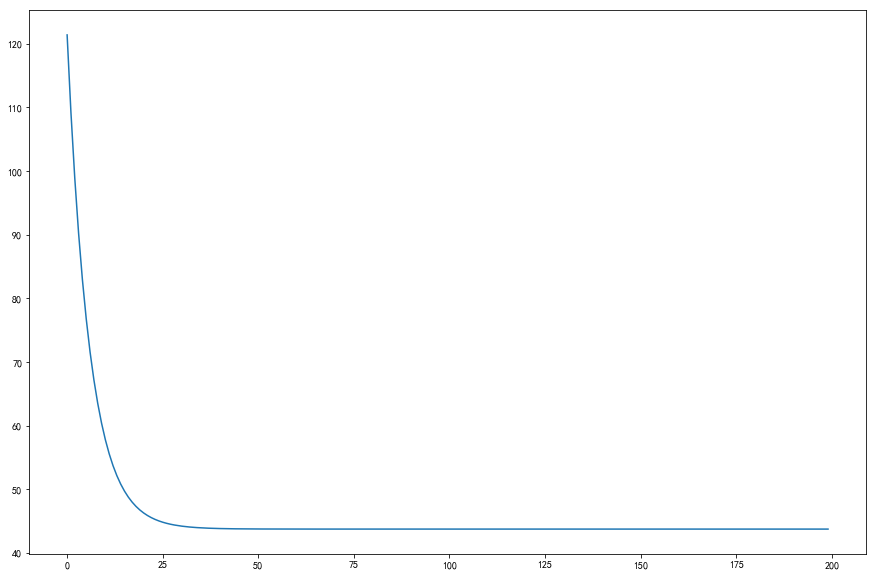

In [185]:
plt.plot(list(range(iteration_num)),losses)

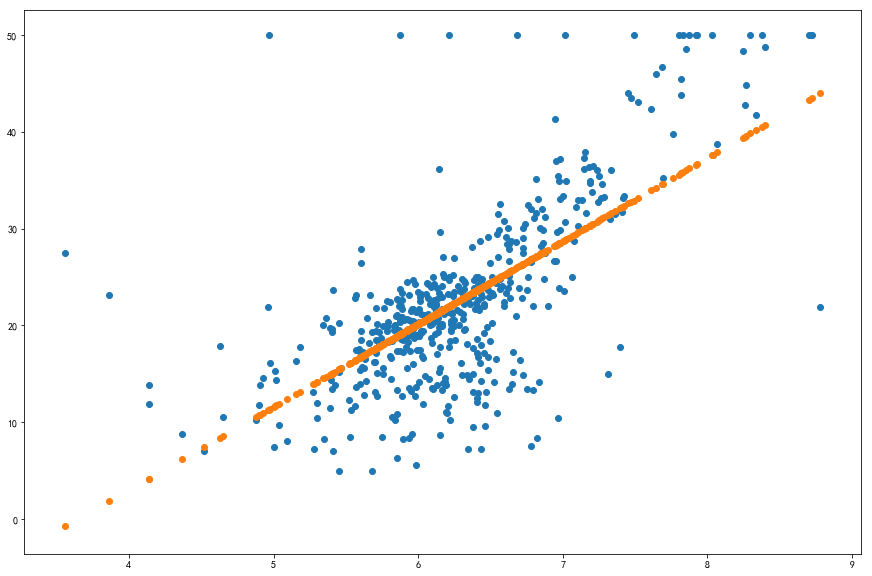

In [187]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

In [ ]:
1.All costs between two nodes are positive or zero.
2.Sort the list used to maintain the searching in every iteration.
Under thes two coditions, BFS is guaranteed to find optimal result.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

In [ ]:
DFS在处理一些“目标节点较浅”的问题时往往效率不够高。解决的办法是设定一个深度限制d，使得我们只在深度d范围内搜索。这样如果目标节点在该范围内，那么就很轻易地找到了解。而只要我们让d从1开始逐渐递增，那么就可以在有限步内找到目标节点。这就是迭代加深搜索思想。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

In [ ]:
广度优先遍历与深度优先遍历的区别在于：广度优先遍历是以层为顺序，将某一层上的所有节点都搜索到了之后才向下一层搜索；而深度优先遍历是将某一条枝桠上的所有节点都搜索到了之后，才转向搜索另一条枝桠上的所有节点。

##### 2.4 When can we use machine learning ?

In [ ]:
机器学习（Machine Learning，ML）是指从有限的观测数据中学习（或“猜测”）出具有一般性的规律，并利用这些规律对未知数据进行预测的方法。
使用机器学习的几个关键因素：1、存在一个模式或者说表现可以让我们对它进行改进提高；2、规则并不容易那么定义；3、需要有数据。
机器学习的类型：分类、聚类、回归、降维，
具体案例：垃圾邮件分类。房价预测。数据挖掘。推荐系统。语音和手写识别。
当然，ML 并不是适用于所有问题类型的解决方案。

##### 2.5 What is the gradient of a function ?

In [ ]:
梯度是一个向量即有方向有大小。

梯度的方向与取得最大方向导数的方向一致，模为方向导数的最大值。
方向导数最大的方向就是梯度的方向，方向导数的最大值就是梯度的值。

梯度是机器学习深度学习中求解参数中非常关键的一个概念

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

In [ ]:
如果我们要求解一个最大值问题，就需要向梯度正方向迭代进行搜索，逐渐接近函数的局部最大解，这个过程则被称为梯度上升法。

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-May

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [ ]:
#http://map.amap.com/service/subway?_1590290810514&srhdata=5000_drw_chongqing.json

In [67]:
import re
from collections import defaultdict
import bs4
import requests
from requests.compat import urljoin

In [68]:
url = r'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A'
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36"}


In [69]:
def get_line_urls(url, name='重庆轨道交通'):
    r = requests.get(url, headers=headers)
    r.encoding = 'utf-8'

    s = bs4.BeautifulSoup(r.text)

    url_map = {}
    for link in s.find_all('a'):
        line_name = link.string
        if line_name and line_name.startswith(name):
            try:
                href = link.get('href')
                url = urljoin('https://baike.baidu.com/', href)
                url_map[line_name] = url
            except:
                pass
    return url_map

In [70]:
url_map = get_line_urls(url)

In [71]:
url_map

{'重庆轨道交通2号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A2%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通1号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A1%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通3号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A3%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通4号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A4%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通5号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A5%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通6号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A6%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通10号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A10%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通环线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A%E7%8E%AF%E7%BA%BF/6262744',
 '重庆轨道交通18号线': 'https://baike.ba

In [ ]:
####获取各线路URL信息并保存

In [74]:
line_list = ['1号线', '2号线', '3号线', '4号线', '6号线', '10号线', '9号线', '18号线', '环线']
line_url = {k:v for k,v in url_map.items() if k[6:] in line_list}

In [75]:
line_url

{'重庆轨道交通2号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A2%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通1号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A1%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通3号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A3%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通4号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A4%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通6号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A6%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通10号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A10%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通环线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A%E7%8E%AF%E7%BA%BF/6262744',
 '重庆轨道交通18号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A18%E5%8F%B7%E7%BA%BF/22162379',
 '重庆轨道交通9号线': 'https:

In [76]:
for name, url in line_url.items():
    r = requests.get(url, headers=headers)
    r.encoding = 'utf-8'
    filename = name + '.txt'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(r.text)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [77]:
line_url = {'重庆轨道交通2号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A2%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通1号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A1%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通3号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A3%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通4号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A4%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通6号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A6%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通10号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A10%E5%8F%B7%E7%BA%BF',
 '重庆轨道交通环线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A%E7%8E%AF%E7%BA%BF/6262744',
 '重庆轨道交通18号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A18%E5%8F%B7%E7%BA%BF/22162379',
 '重庆轨道交通9号线': 'https://baike.baidu.com/item/%E9%87%8D%E5%BA%86%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A9%E5%8F%B7%E7%BA%BF'}

In [78]:
text1 = '<tr><td width="131" valign="top">站名</td><td width="195" valign="top">所在区域</td><td width="153" valign="top">换乘线路</td><td width="180" valign="top">开通时间</td></tr>'
text2 = '<tr><td><div class="para" label-module="para">序号</div></td><td><div class="para" label-module="para">车站名称</div></td><td><div class="para" label-module="para">中心里程</div></td><td><div class="para" label-module="para">右线站间距（m）</div></td><td><div class="para" label-module="para">站 型</div></td><td width="134" height="38">换乘线路</td></tr>'
text3 = '<tr></tr>'

In [79]:
s1 = bs4.BeautifulSoup(text1).tr
s2 = bs4.BeautifulSoup(text2).tr
s3 = bs4.BeautifulSoup(text3).tr

In [80]:
type(s3)

bs4.element.Tag

In [81]:
for s in s1.children:
    print(type(s))
    print(s)

<class 'bs4.element.Tag'>
<td valign="top" width="131">站名</td>
<class 'bs4.element.Tag'>
<td valign="top" width="195">所在区域</td>
<class 'bs4.element.Tag'>
<td valign="top" width="153">换乘线路</td>
<class 'bs4.element.Tag'>
<td valign="top" width="180">开通时间</td>


In [82]:
def find_station_col(header):
    cols = header.children
    if cols is None: return
    for i, col in enumerate(cols):
        if '站名' in str(col):
            return i

In [84]:
find_station_col(s2)

1

In [85]:
def find_station(row, station_col):
    cols = list(row.children)
    try:
        s = cols[station_col]
        pat = re.compile('>([^<>]+)<')
        match = pat.search(str(s))
        return match.group(1)
    except:
        return None

In [86]:
def find_stations(table):
    stations = []
    rows = table.find_all('tr')
    header = rows[0]
    station_col = find_station_col(header)
    if station_col is not None:
        for row in rows[1:]:
            station = find_station(row, station_col)
            if station:
                stations.append(station)
    return stations

In [ ]:
### 多个表中获取站名列表

In [87]:
def complete_stations(tables):
    return max([find_stations(table) for table in tables], key=len)

In [ ]:
###　从保存的文件中获取站名列表

In [91]:
def get_stations(filename):
    r = open(filename, 'r', encoding='utf-8')
    s = bs4.BeautifulSoup(r)
    r.close()
    tables = s.find_all('table')
    if tables:
        return complete_stations(tables)

In [92]:
stations = get_stations('重庆轨道交通环线.txt')
stations

['重庆图书馆站',
 '天星桥站',
 '沙坪坝站',
 '重庆大学站',
 '玉带山站',
 '南桥寺站',
 '体育公园站',
 '冉家坝站',
 '动步公园站',
 '洪湖东路站',
 '民安大道站',
 '重庆北站南广场站',
 '渝鲁站',
 '五里店站',
 '弹子石站',
 '涂山站',
 '仁济站',
 '上新街站',
 '上浩站',
 '海棠溪站',
 '罗家坝站',
 '四公里站',
 '南湖站',
 '海峡路站',
 '谢家湾站',
 '奥体中心站',
 '陈家坪站',
 '彩云湖站',
 '二郎站']

In [93]:
line_stations = defaultdict(list)

for name in line_url:
    stations = get_stations(name+'.txt')
    line_stations[name] = stations

In [94]:
line_stations 

defaultdict(list,
            {'重庆轨道交通2号线': ['较场口站',
              '临江门站',
              '黄花园站',
              '大溪沟站',
              '曾家岩站',
              '牛角沱站',
              '李子坝站',
              '佛图关站',
              '大坪站',
              '袁家岗站',
              '谢家湾站',
              '杨家坪站',
              '动物园站',
              '大堰村站',
              '马王场站',
              '平安站',
              '大渡口站',
              '新山村站',
              '天堂堡站',
              '建桥站',
              '金家湾站',
              '刘家坝站',
              '白居寺站',
              '大江站',
              '鱼洞站'],
             '重庆轨道交通1号线': ['朝天门站',
              '小什字站',
              '较场口站',
              '七星岗站',
              '两路口站',
              '鹅岭站',
              '大坪站',
              '石油路站',
              '歇台子站',
              '石桥铺站',
              '高庙村站',
              '马家岩站',
              '小龙坎站',
              '沙坪坝站',
              '杨公桥站',
              '烈士墓站',
              '磁器口站',
              '石井坡站',
              '双

In [ ]:
###　获取每个站点的下一站点

In [95]:
def overlapping_pairs(items):
    return [items[i:i+2] for i in range(len(items)-1)]

In [98]:
def next_station(line_stations):
    next = defaultdict(set)
    for name, stations in line_stations.items():
        for a, b in overlapping_pairs(stations):
            next[a].add(b)
            next[b].add(a)
    return next
            

In [99]:
nexts = next_station(line_stations)
nexts

defaultdict(set,
            {'较场口站': {'七星岗站', '临江门站', '小什字站'},
             '临江门站': {'较场口站', '黄花园站'},
             '黄花园站': {'临江门站', '大溪沟站'},
             '大溪沟站': {'曾家岩站', '黄花园站'},
             '曾家岩站': {'大溪沟站', '牛角沱站'},
             '牛角沱站': {'两路口站', '华新街站', '曾家岩站', '李子坝站'},
             '李子坝站': {'佛图关站', '牛角沱站'},
             '佛图关站': {'大坪站', '李子坝站'},
             '大坪站': {'佛图关站', '石油路站', '袁家岗站', '鹅岭站'},
             '袁家岗站': {'大坪站', '谢家湾站'},
             '谢家湾站': {'奥体中心站', '杨家坪站', '海峡路站', '袁家岗站'},
             '杨家坪站': {'动物园站', '谢家湾站'},
             '动物园站': {'大堰村站', '杨家坪站'},
             '大堰村站': {'动物园站', '马王场站'},
             '马王场站': {'大堰村站', '平安站'},
             '平安站': {'大渡口站', '马王场站'},
             '大渡口站': {'平安站', '新山村站'},
             '新山村站': {'大渡口站', '天堂堡站'},
             '天堂堡站': {'建桥站', '新山村站'},
             '建桥站': {'天堂堡站', '金家湾站'},
             '金家湾站': {'刘家坝站', '建桥站'},
             '刘家坝站': {'白居寺站', '金家湾站'},
             '白居寺站': {'刘家坝站', '大江站'},
             '大江站': {'白居寺站', '鱼洞站'},
   

In [100]:
url='http://map.amap.com/service/subway?_1590290810514&srhdata=5000_drw_chongqing.json'

In [101]:
import json
from collections import defaultdict

In [102]:
#保存
# with open('subway.json', 'w', encoding='utf-8') as f:
#     r = requests.get(url)
#     json.dump(r.json(), f, indent=4)

In [103]:
with open('subway.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [104]:
#type(data)

dict

In [109]:
#data['l']

In [110]:
line_stops = defaultdict(list)
for line in data['l']:
    full_name = line['kn']
    name = line['ln']
    stops_info = line['st']
    for stop_info in stops_info:
        stop = stop_info['n']
        long, lat = map(float, stop_info['sl'].split(','))
        line_stops[(full_name, name)].append((stop, (long, lat)))   

In [111]:
import pprint
pprint.pprint(line_stops)

defaultdict(<class 'list'>,
            {('轨道交通10号线', '10号线'): [('鲤鱼池', (106.550159, 29.573995)),
                                    ('红土地', (106.551176, 29.584019)),
                                    ('龙头寺公园', (106.550608, 29.598653)),
                                    ('重庆北站南广场', (106.549274, 29.606696)),
                                    ('重庆北站北广场', (106.551195, 29.612922)),
                                    ('民心佳园', (106.567621, 29.626609)),
                                    ('三亚湾', (106.584785, 29.638338)),
                                    ('上湾路', (106.608952, 29.649889)),
                                    ('环山公园', (106.622117, 29.658846)),
                                    ('长河', (106.629425, 29.674056)),
                                    ('江北机场T3航站楼', (106.655275, 29.708424)),
                                    ('江北机场T2航站楼', (106.638292, 29.718703)),
                                    ('渝北广场', (106.629849, 29.718544)),
                                    ('

In [112]:
stop_location = {}
for s in line_stops.values():
    for stop, location in s:
        stop_location[stop] = location

In [113]:
stop_location

{'小什字': (106.583593, 29.560028),
 '较场口': (106.574352, 29.553575),
 '七星岗': (106.563142, 29.554871),
 '两路口': (106.549342, 29.552621),
 '鹅岭': (106.533923, 29.547986),
 '大坪': (106.519184, 29.541886),
 '石油路': (106.508308, 29.53811),
 '歇台子': (106.498353, 29.53548),
 '石桥铺': (106.484891, 29.532771),
 '高庙村': (106.469211, 29.536409),
 '马家岩': (106.468033, 29.544984),
 '小龙坎': (106.468325, 29.553658),
 '沙坪坝': (106.460425, 29.556003),
 '杨公桥': (106.450227, 29.561544),
 '烈士墓': (106.445437, 29.567434),
 '磁器口': (106.44642, 29.576719),
 '石井坡': (106.444283, 29.589415),
 '双碑': (106.44437, 29.605775),
 '赖家桥': (106.381441, 29.610285),
 '微电园': (106.362894, 29.609665),
 '陈家桥': (106.328499, 29.607427),
 '大学城': (106.308908, 29.60735),
 '尖顶坡': (106.292967, 29.607324),
 '璧山': (106.232616, 29.612254),
 '临江门': (106.574228, 29.558281),
 '黄花园': (106.564839, 29.563396),
 '大溪沟': (106.558397, 29.566175),
 '曾家岩': (106.550111, 29.566468),
 '牛角沱': (106.542605, 29.560679),
 '李子坝': (106.53766, 29.552892),
 '佛图关': (106.531503,

In [169]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_geo_distance(city1, city2):
    return geo_distance(stop_location[city1], stop_location[city2])

In [170]:
get_geo_distance('璧山','五里店') 

36.98864605977062

In [123]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
stop_graph = nx.Graph()

In [124]:
stop_graph.add_nodes_from(list(stop_location.keys()))

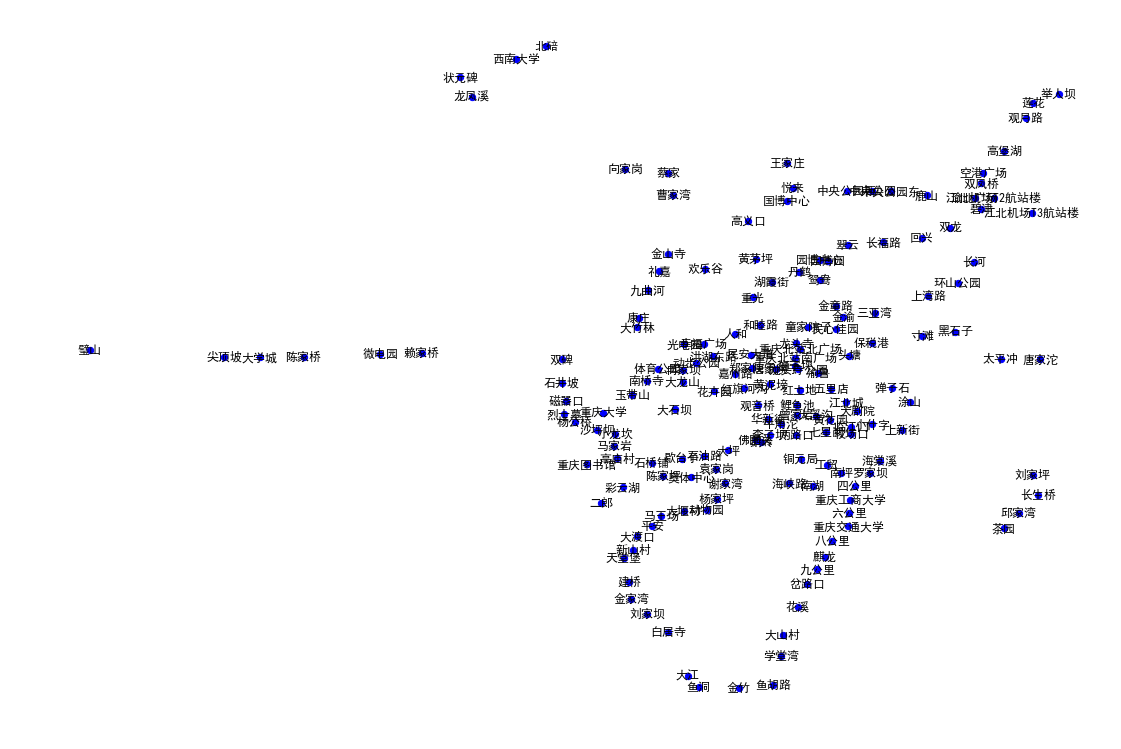

In [144]:
nx.draw(stop_graph, stop_location, with_labels=True, node_size=40, font_size=12, node_color='blue')

In [126]:
line_stops_info = {k[0]:list([i[0] for i in v]) for k,v in line_stops.items()}

In [127]:
line_stops_info

{'轨道交通1号线': ['小什字',
  '较场口',
  '七星岗',
  '两路口',
  '鹅岭',
  '大坪',
  '石油路',
  '歇台子',
  '石桥铺',
  '高庙村',
  '马家岩',
  '小龙坎',
  '沙坪坝',
  '杨公桥',
  '烈士墓',
  '磁器口',
  '石井坡',
  '双碑',
  '赖家桥',
  '微电园',
  '陈家桥',
  '大学城',
  '尖顶坡',
  '璧山'],
 '轨道交通2号线': ['较场口',
  '临江门',
  '黄花园',
  '大溪沟',
  '曾家岩',
  '牛角沱',
  '李子坝',
  '佛图关',
  '大坪',
  '袁家岗',
  '谢家湾',
  '杨家坪',
  '动物园',
  '大堰村',
  '马王场',
  '平安',
  '大渡口',
  '新山村',
  '天堂堡',
  '建桥',
  '金家湾',
  '刘家坝',
  '白居寺',
  '大江',
  '鱼洞'],
 '轨道交通3号线': ['鱼洞',
  '金竹',
  '鱼胡路',
  '学堂湾',
  '大山村',
  '花溪',
  '岔路口',
  '九公里',
  '麒龙',
  '八公里',
  '重庆交通大学',
  '六公里',
  '重庆工商大学',
  '四公里',
  '南坪',
  '工贸',
  '铜元局',
  '两路口',
  '牛角沱',
  '华新街',
  '观音桥',
  '红旗河沟',
  '嘉州路',
  '郑家院子',
  '唐家院子',
  '狮子坪',
  '重庆北站南广场',
  '龙头寺',
  '童家院子',
  '金渝',
  '金童路',
  '鸳鸯',
  '园博园',
  '翠云',
  '长福路',
  '回兴',
  '双龙',
  '碧津',
  '江北机场T2航站楼'],
 '轨道交通3号线北延伸段(空港线)': ['碧津', '双凤桥', '空港广场', '高堡湖', '观月路', '莲花', '举人坝'],
 '轨道交通4号线': ['唐家沱', '太平冲', '黑石子', '寸滩', '保税港', '头塘', '重庆北站北广场', '民安大道'],
 '轨道交通5号线': ['大石坝',
  '大龙山',


In [128]:
def overlapping_pairs(items):
    return [items[i:i+2] for i in range(len(items)-1)]

In [129]:
def nexts(line_stops_info):
    next_stops = defaultdict(set)
    for name, stops in line_stops_info.items():
        for a, b in overlapping_pairs(stops):
            next_stops[a].add(b)
            next_stops[b].add(a)
    return next_stops

In [130]:
next_stops = nexts(line_stops_info)
next_stops

defaultdict(set,
            {'小什字': {'上新街', '大剧院', '较场口'},
             '较场口': {'七星岗', '临江门', '小什字'},
             '七星岗': {'两路口', '较场口'},
             '两路口': {'七星岗', '牛角沱', '铜元局', '鹅岭'},
             '鹅岭': {'两路口', '大坪'},
             '大坪': {'佛图关', '石油路', '袁家岗', '鹅岭'},
             '石油路': {'大坪', '歇台子'},
             '歇台子': {'石桥铺', '石油路'},
             '石桥铺': {'歇台子', '高庙村'},
             '高庙村': {'石桥铺', '马家岩'},
             '马家岩': {'小龙坎', '高庙村'},
             '小龙坎': {'沙坪坝', '马家岩'},
             '沙坪坝': {'小龙坎', '杨公桥', '重庆图书馆', '重庆大学'},
             '杨公桥': {'沙坪坝', '烈士墓'},
             '烈士墓': {'杨公桥', '磁器口'},
             '磁器口': {'烈士墓', '石井坡'},
             '石井坡': {'双碑', '磁器口'},
             '双碑': {'石井坡', '赖家桥'},
             '赖家桥': {'双碑', '微电园'},
             '微电园': {'赖家桥', '陈家桥'},
             '陈家桥': {'大学城', '微电园'},
             '大学城': {'尖顶坡', '陈家桥'},
             '尖顶坡': {'大学城', '璧山'},
             '璧山': {'尖顶坡'},
             '临江门': {'较场口', '黄花园'},
             '黄花园': {'临江门', '大溪沟'},
      

In [131]:
def search(start, end):
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in next_stops[s]:
            if next not in explored:
                explored.add(next)
                path2 = path + [next]
                if next == end:
                    return '-->'.join(path2)
                else:
                    frontier.append(path2)
        
    return []   

In [140]:
path = search('沙坪坝', '两路口')
path

'沙坪坝-->小龙坎-->马家岩-->高庙村-->石桥铺-->歇台子-->石油路-->大坪-->鹅岭-->两路口'

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [171]:
def minimum_transfer_priority(pathes):
    return min(pathes, key=len)

In [172]:
def maximum_transfer_priority(pathes):
    return max(pathes, key=len)

In [156]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i - 1], path[i])
        return distance

    return sorted(pathes, key=get_path_distnace)

def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)


def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [157]:
def shortest_path_priority(pathes):
    def path_distance(path):
        return sum(get_geo_distance(stop1, stop2) for stop1, stop2 in overlapping_pairs(path))
    return min(pathes, key=path_distance)

In [159]:
def search(start, destination, strategy):
    pathes = []
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in next_stops[s]:
            if next not in explored:
                # explored.add(next) 
                path2 = path + [next]
                if next == destination:
                    pathes.append(path2)
                else:
                    frontier.append(path2)
        explored.add(s)
    return strategy(pathes)

In [174]:
search('沙坪坝', '红旗河沟', strategy=minimum_transfer_priority)

['沙坪坝', '重庆大学', '玉带山', '南桥寺', '体育公园', '冉家坝', '大龙山', '花卉园', '红旗河沟']

In [175]:
search('沙坪坝', '红旗河沟', strategy=maximum_transfer_priority)

['沙坪坝',
 '重庆大学',
 '玉带山',
 '南桥寺',
 '体育公园',
 '冉家坝',
 '动步公园',
 '洪湖东路',
 '民安大道',
 '重庆北站北广场',
 '重庆北站南广场',
 '狮子坪',
 '唐家院子',
 '郑家院子',
 '嘉州路',
 '红旗河沟']

In [177]:
#search('沙坪坝', '红旗河沟', strategy=transfer_stations_first)

In [179]:
#search('沙坪坝', '红旗河沟', strategy=transfer_as_much_possible)

In [181]:
search('沙坪坝', '红旗河沟', strategy=shortest_path_priority)

['沙坪坝', '重庆大学', '玉带山', '南桥寺', '体育公园', '冉家坝', '大龙山', '花卉园', '红旗河沟']

In [165]:
def search2(start, destination):
    pathes = []
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in next_stops[s]:
            if next not in explored:
                # explored.add(next) 
                path2 = path + [next]
                if next == destination:
                    return path2
                else:
                    frontier.append(path2)
        explored.add(s)
    return []

In [188]:
search2('大学城', '西南大学')

['大学城',
 '陈家桥',
 '微电园',
 '赖家桥',
 '双碑',
 '石井坡',
 '磁器口',
 '烈士墓',
 '杨公桥',
 '沙坪坝',
 '重庆大学',
 '玉带山',
 '南桥寺',
 '体育公园',
 '冉家坝',
 '光电园',
 '大竹林',
 '康庄',
 '九曲河',
 '礼嘉',
 '金山寺',
 '曹家湾',
 '蔡家',
 '向家岗',
 '龙凤溪',
 '状元碑',
 '西南大学']

In [ ]:
参考
https://blog.csdn.net/wuShiJingZuo/article/details/89666912
http://map.amap.com/subway/index.html?&5000
http://map.amap.com/service/subway?_1590290810514&srhdata=5000_drw_chongqing.json
https://zoutao.blog.csdn.net/article/details/103353340

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 